# Logistic Regression with Synthetic Data

For more explanation of logistic regression, see
1. [Our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#binomial-logistic-regression)
1. [This scikit-learn explanation](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [The full scikit-learn documentation of the LogisticRegression model class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
  * [Data Generation](#Data-Generation)
  * [Visualization](#Visualization)
  * [Model Training](#Model-Training)
  * [Prediction](#Prediction)
0. Complete at least one of the exercise options:
  * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
  * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)
  * [Exercise Option #3 - Advanced Difficulty](#Exercise-Option-#3---Advanced-Difficulty)

In [2]:
import numpy.random # for generating our dataset
from sklearn import linear_model # for fitting our model

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
numpy.set_printoptions(suppress=True)

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Data Generation

As we did in the [linear regression notebook](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LinearRegression.ipynb), we will be generating some fake data.

In this fake dataset, we have two types of plants.
* Plant A tends to be taller (average 60cm) and thinner (average 8cm).
* Plant B tends to be shorter (average 58cm) and wider (average 10cm).
* The heights and diameters of both plants are normally distributed (they follow a bell curve).

* Class 0 will represent Plant A and Class 1 will represent Plant B

In [3]:
NUM_INPUTS = 50 # inputs per class
PLANT_A_AVG_HEIGHT = 59.0
PLANT_A_AVG_WIDTH = 9.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0

# Pick numbers randomly with a normal distribution centered around the averages

plant_a_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plant_a_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plant_b_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plant_b_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

# this creates a 2-dimensional matrix, with heights in the first column and widths in the second
# the first half of rows are all plants of type a and the second half are type b
plant_inputs = list(zip(numpy.append(plant_a_heights, plant_b_heights),
                        numpy.append(plant_a_widths, plant_b_widths)))

# this is a list where the first half are 0s (representing plants of type a) and the second half are 1s (type b)
classes = [0]*NUM_INPUTS + [1]*NUM_INPUTS

## Visualization

Let's visualize our dataset, so that we can better understand what it looks like.

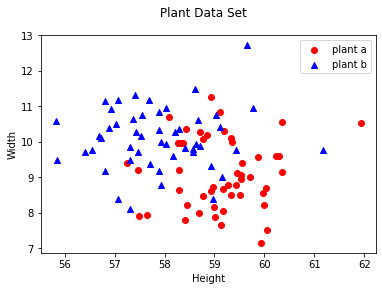

In [4]:
# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Plant Data Set')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

# put the generated points on the graph
a_scatter = matplotlib.pyplot.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a')
b_scatter = matplotlib.pyplot.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b')

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our logistic regression model to our dataset.

In [5]:
model = linear_model.LogisticRegression()
model.fit(plant_inputs, classes)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [61.23295758]  Coefficients: [[-1.21090126  0.99982279]]


## Prediction

Now we can make some predictions using the trained model. Note that we are generating the new data exactly the same way that we generated the training data above.

In [6]:
# Generate some new random values for two plants, one of each class
new_a_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=50)
new_a_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=50)
new_b_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=50)
new_b_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=50)

# Pull the values into a matrix, because that is what the predict function wants
#inputs = [[new_a_height, new_a_width], [new_b_height, new_b_width]]
inputs = list(zip(numpy.append(new_a_height, new_b_height), numpy.append(new_a_width, new_b_width)))

# Print out the outputs for these new inputs
#print('Plant A: {0} {1}'.format(new_a_height, new_a_width))
#print('Plant B: {0} {1}'.format(new_b_height, new_b_width))
prediction = model.predict(inputs)
print(prediction[:50])
print(prediction[50:])
print('Class predictions: {0}'.format(prediction)) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

[0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 0]
[1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1]
Class predictions: [0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Probabilities:
[[0.95245606 0.04754394]
 [0.52346448 0.47653552]
 [0.62657755 0.37342245]
 [0.89530874 0.10469126]
 [0.96780957 0.03219043]
 [0.50159052 0.49840948]
 [0.98181947 0.01818053]
 [0.1916717  0.8083283 ]
 [0.27529134 0.72470866]
 [0.35306395 0.64693605]
 [0.12892373 0.87107627]
 [0.28942096 0.71057904]
 [0.65380702 0.34619298]
 [0.19448362 0.80551638]
 [0.508319   0.491681  ]
 [0.72079265 0.27920735]
 [0.83690204 0.16309796]
 [0.63749613 0.36250387]
 [0.95891959 0.04108041]
 [0.38954883 0.61045117]
 [0.17126274 0.82873726]
 [0.99390423 0.00609577]
 [0.90

# Exercise Option #1 - Standard Difficulty

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. What should we be expecting as the output for class predictions in the above cell? If the model is not giving the expected output, what are some of the reasons it might not be?
1. How do the probabilities output by the above cell relate to the class predictions? Why do you think the model might be more or less confident in its predictions?
1. If you change the averages in the data generation code (like PLANT_A_AVG_HEIGHT) and re-run the code, how do the predictions change, and why?
1. Looking at the intercept and coefficient output further above, if a coefficient is negative, what has the model learned about this feature? In other words, if you took a datapoint and you increased the value of a feature that has a negative coefficient, what would you expect to happen to the probabilities the model gives this datapoint?

1. 0, 1. Most likely it is because one or more of the characteristics of the plant are beyond the cutoff that the model sets, so it is considered to be in the other class. For example one time I saw that the plant B had a height of 59.8 and plant A had 59, which are both totally reasonable values, but impossible for the model to distinguish between.
2. The probability which is higher determines how the model will classify a given point. It is less confident the closer a point is to the cutoff because on that line, the probabilities are 50 50.
3. (I changed the cell above so it creates 100 data points, and is split down the middle so it is easier to count) Before changing the averages, I noticed that the model was 4% wrong. After changing the plant A average height to 62, the model was 2% wrong. When I changed plant A average height to 59, the model was 6% wrong. Lastly, when I change the plant A average height to 59 and plant A average width to 9, we had an error rate of 16%. This shows that the closer the averages of the classes are, the higher the error rate will be.
4. A negative coefficient means the model finds the parameter is inversely correlated with a certain class, so the higher that parameter is, the lower the probability it will be in that class. In this case, the first coefficient is negative, meaning the model thinks that bigger height (the first parameter) will mean a data point is less likely to be in class B, which the model is classifying for (as it is a 1).

# Exercise Option #2 - Advanced Difficulty

The plot above is only showing the data, and not anything about what the model learned. Come up with some ideas for how to show the model fit and implement one of them in code. Remember, we are here to help if you are not sure how to write the code for your ideas!

In [7]:
MIN_X = 55
MAX_X = 63
MIN_Y = 5
MAX_Y = 13

In [8]:
def plot_areas_of_guess(model, xa, ya, xb, yb):
    fig = matplotlib.pyplot.figure()
    fig.suptitle('Plant Data Set')
    matplotlib.pyplot.xlabel('Height')
    matplotlib.pyplot.ylabel('Width')
    
    #x = numpy.linspace(MIN_X, MAX_X)
    #y = numpy.linspace(MIN_Y, MAX_Y)
    #xp, yp = numpy.meshgrid(x, y) https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
    xp, yp = numpy.mgrid[MIN_X:MAX_X:100j, MIN_Y:MAX_Y:100j]  # mgrid is like 2d linspace; https://stackoverflow.com/questions/32208359/is-there-a-multi-dimensional-version-of-arange-linspace-in-numpy
    xp = xp.flatten(order='F')
    yp = yp.flatten(order='F')
    
    predictions = model.predict(list(zip(xp, yp)))  # do the prediction for each point in the mgrid
    
    xap = xp[predictions==0]  # separate the a and b predictions
    yap = yp[predictions==0]
    xbp = xp[predictions==1]
    ybp = yp[predictions==1]
    
    matplotlib.pyplot.plot(xap, yap, c="pink", zorder=1)  # allow comparison to actual a and b class points
    matplotlib.pyplot.plot(xbp, ybp, c="turquoise", zorder=1)
    
    a_scatter = matplotlib.pyplot.scatter(xa, ya, c="red", marker="o", label='a', zorder=2)  # zorder brings it to front
    b_scatter = matplotlib.pyplot.scatter(xb, yb, c="blue", marker="^", label='b', zorder=2)

    matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])

    matplotlib.pyplot.show()

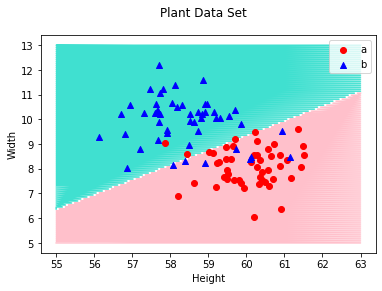

In [57]:
plot_areas_of_guess(model, plant_a_heights, plant_a_widths, plant_b_heights, plant_b_widths)

This shows very clearly how the model determines how to classify whether a point is in class a or b: based on what area of the 2d space a point lies

## ROC Curve

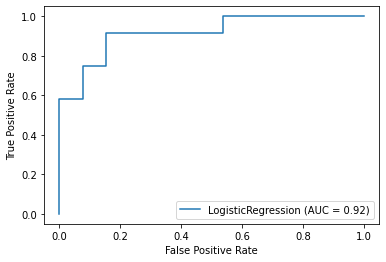

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = plant_inputs, classes
X_train, X_test, y_train, y_test = model_selection.train_test_split(            X, y, random_state=0)
roc_model = linear_model.LogisticRegression()
roc_model.fit(X_train, y_train)
X_train, X_test, y_train, y_test = model_selection.train_test_split(            X, y, random_state=0)
metrics.plot_roc_curve(roc_model, X_test, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
The area under the curve is 0.92, meaning 92% of the time, the model classifies correct

# Exercise Option #3 - Advanced Difficulty

If you have more than two classes, you can use multinomial logistic regression or the one vs. rest technique, where you use a binomial logistic regression for each class that you have and decide if it is or is not in that class. Try expanding the program with a third type and implementing your own one vs. rest models. To test if this is working, compare your output to running your expanded dataset through scikit-learn, which will automatically do one vs. rest if there are more than two classes.